# Práctica VideoGamesSales

El objetivo consiste en pronosticar las ventas de un nuevo videojuego en función de datos como la compañía, género o plataforma en la que se ha desarrollado.

Utilizaremos un método de aprendizaje supervisado, ya que disponemos de datos de venta de cada uno de ellos.
Para ello usaremos distintos métodos como Regresión lineal, redes neuronales o SVM entre otros. 

El Dataset de entrada contiene un listado de todos los juegos vendidos desde el año 1980.

Para enfrentar el problema comenzamos por importar los paquetes requeridos.


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model

### 1. Información de los datos y carga

El archivo que recibimos contiene 16 características, lo más destacables:

• Plataforma de lanzamiento(XboxOne, PlayStation...)

• Año de lanzamiento

• Género 

• Editor

• Valoraciones

• Clasificación de juego https://es.wikipedia.org/wiki/Sistema_de_clasificaci%C3%B3n_de_contenido_de_videojuegos

Una muestra de los datos de los más de 16000 se muestra a continuación como un panda DataFrame.


In [55]:
df=pd.read_csv("C://Video_Games_Sales.csv")
print("Resgistros iniciales: " +str(df.shape))
df.head()

Resgistros iniciales: (16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Podemos ver que en la cabecera ya tenemos registros con valores no informados por lo que comenzaremos con la preparación de los datos.
Veamos antes el tipado y las estadísticas de éstos:


In [56]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [57]:
df.describe()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [58]:
#Veamos los detalles de las variables categóricas
categoricas = df.dtypes[df.dtypes == "object"].index
print(categoricas)

df[categoricas].describe()

Index(['Name', 'Platform', 'Genre', 'Publisher', 'User_Score', 'Developer',
       'Rating'],
      dtype='object')


,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


Comprobamos que para aquellos nombres de vieojuego que contienen "," realiza correctamente la separación en columnas

In [59]:
 df.loc[df.Name.str.contains("Warhammer", na=False)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3566,"Warhammer 40,000: Space Marine",X360,2011.0,Shooter,THQ,0.25,0.26,0.0,0.06,0.56,76.0,57.0,7.8,232.0,Relic,M
4179,"Warhammer 40,000: Dawn of War II",PC,2009.0,Strategy,THQ,0.00,0.45,0.0,0.02,0.47,85.0,67.0,8.1,1502.0,Relic,M
4375,"Warhammer 40,000: Space Marine",PS3,2011.0,Shooter,THQ,0.13,0.23,0.0,0.08,0.44,70.0,46.0,7.4,162.0,Relic,M
5595,"Warhammer 40,000: Squad Command",PSP,2007.0,Strategy,THQ,0.11,0.13,0.0,0.08,0.32,67.0,25.0,7.6,26.0,RedLynx,T
7529,"Warhammer 40,000: Space Marine",PC,2011.0,Shooter,THQ,0.09,0.09,0.0,0.03,0.20,74.0,34.0,7.4,596.0,Relic,M
7847,Warhammer: Shadow of the Horned Rat,PS,1996.0,Strategy,Mindscape,0.11,0.07,0.0,0.01,0.19,NaN,NaN,NaN,NaN,NaN,NaN
8710,"Warhammer 40,000: Fire Warrior",PS2,2003.0,Shooter,THQ,0.08,0.06,0.0,0.02,0.15,64.0,23.0,8.3,63.0,Kuju Entertainment,M
10084,Warhammer: Battle March,X360,2008.0,Strategy,Deep Silver,0.09,0.02,0.0,0.01,0.11,55.0,30.0,6.7,20.0,Black Hole Games,M
10685,"Warhammer 40,000: Dawn of War II - Chaos Rising",PC,2010.0,Strategy,THQ,0.08,0.01,0.0,0.01,0.10,NaN,NaN,NaN,NaN,NaN,NaN
11517,"Warhammer 40,000: Dawn of War II - Retribution",PC,2011.0,Strategy,THQ,0.00,0.06,0.0,0.02,0.08,80.0,52.0,7.8,235.0,Relic,M


## 2. Limpieza del dataset

Consultemos la información de nulos del conjunto de datos para conocer los detalles.

In [60]:
df.isnull().any().count()
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [61]:
#Rellenamos aquellos valores numéricos con la media
df=df.fillna(df.mean())
df.isnull().any().count()
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

Los valores nulos categóricos no podemos pronosticarlos porque podrían afectar mucho al resultado de la evaluación,por eso voy a deshacerme de todos estos valores nulos en lugar de llenarlos con media, mediana, moda o cualquier otro tipo de datos genéricos.

También pasamos a eliminar los valores tipo de String de la columna User_Score

In [62]:
df=df[pd.to_numeric(df['User_Score'], errors='coerce').notnull()]
df = df.dropna(axis=0)
print("Quedando un total de " +str(df.shape) + "registros")

Quedando un total de (7499, 16)registros


### 2.1 Filtro por año de lanzamiento

En primer lugar, ya hemos omitido los videojuegos con años de lanzamiento desconocidos. Además, los videojuegos lanzados en 2017 también se omitirán ya que los datos se recopilaron en enero. Finalmente, pasamos los años a tipo enteros.

In [63]:
# Filtramos menores 2017.
df = df.loc[df.Year_of_Release < 2017]
# Pasamos a tipo enteros
df.Year_of_Release = df['Year_of_Release'].astype(int)

### 2.2 Qué rango de años utilizar

No tiene sentido que tratemos de predecir usando datos de 1980, para ello vamos a ver unas estadísticas de las ventas globales anuales y en qué momento surgieron todos los géneros. Afortunadamente, se puede elegir un año inicial observando las ventas globales anuales totales, la proporción acumulada de ventas anuales globales y el mapa de las ventas mundiales de juegos cada año por género.
Usando estos tres gráficos a continuación, se puede ver que todos los géneros no están completamente representados hasta 1991 y más del 95% de las ventas globales ocurren después de 1991.

Por lo tanto, comenzaremos por considerar las ventas de videojuegos de 1991 a 2016.

In [64]:
# En la tabla TablaVentasGeneroAnyo incluímos las ventas globales totales para cada género y año
TablaVentasGeneroAnyo = pd.pivot_table(df,index=['Year_of_Release'],columns=['Genre'],values=['Global_Sales'],aggfunc=np.sum)
TablaVentasGeneroAnyo.columns = TablaVentasGeneroAnyo.columns.get_level_values(1)
TablaVentasGeneroAnyo.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN
1994,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,10.71,NaN,5.74,1.92,NaN,0.14,NaN,1.59,NaN,NaN,NaN,NaN


In [65]:
# Obtenemos las ventas por año y las acumuladas
VentasAnyo = TablaVentasGeneroAnyo.sum(axis=1).sort_index()
VentasAcumuladasAnyo = VentasAnyo.cumsum()/VentasAnyo.sum()

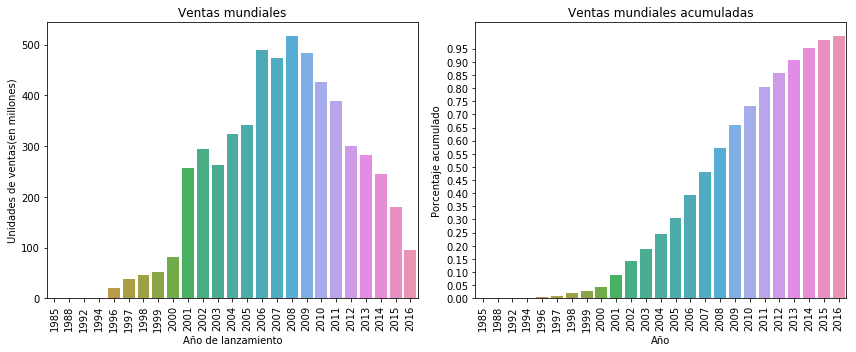

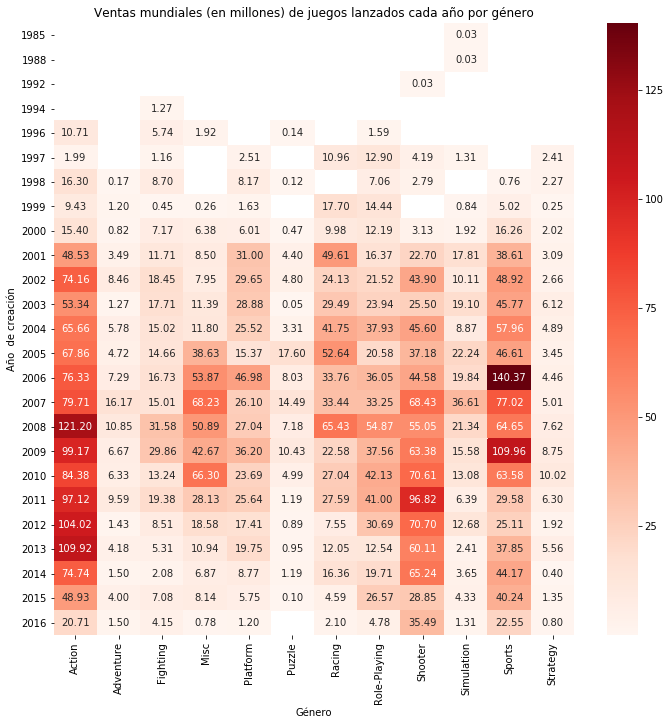

In [66]:
# Creamos las gráficas para su visualización
fig = plt.figure(figsize=(12,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
sns.barplot(y = VentasAnyo.values, x = VentasAnyo.index,ax=ax1)
ax1.set_title('Ventas mundiales')
plt.setp(ax1.get_xticklabels(),rotation=90)
ax1.set_xlabel('Año de lanzamiento')
ax1.set_ylabel('Unidades de ventas(en millones)')

sns.barplot(y = VentasAcumuladasAnyo.values, x = VentasAcumuladasAnyo.index, ax=ax2)
ax2.set_title('Ventas mundiales acumuladas')
plt.setp(ax2.get_xticklabels(),rotation=90)
ax2.set_xlabel('Año')
ax2.set_ylabel('Porcentaje acumulado')
ax2.yaxis.set_ticks(np.arange(0,1,0.05))
fig.tight_layout()

# Mapa de calor de las ventas globales de los juegos lanzados cada año clasificados por género
plt.figure(figsize=(10,10))
sns.heatmap(TablaVentasGeneroAnyo,annot = True, fmt = '.2f', cmap = 'Reds')
plt.tight_layout()
plt.ylabel('Año  de creación')
plt.xlabel('Género')
plt.title('Ventas mundiales (en millones) de juegos lanzados cada año por género')
plt.show()

In [67]:
# Por tanto filtramos por los años 1991-2016
df = df.loc[df.Year_of_Release >= 1991]
print("Quedando un total de " +str(df.shape) + "registros")

Quedando un total de (7497, 16)registros


### 2.3 Unificar plataformas de lanzamiento

Para ello, centralizaremos todas las distintas consolas de lanzamiento en su compañía original:

In [68]:
# Tenemos el siguiente listado de plataformas
df["Platform"].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', '3DS', 'PS4', 'PS', 'XB', 'PC',
       'PSP', 'WiiU', 'GC', 'GBA', 'XOne', 'PSV', 'DC'], dtype=object)

In [69]:
# Añadimos una nueva columna con nombre valor Platform_General
df['Platform_General']= df['Platform']
df.loc[df['Platform'] == 'PS3', 'Platform_General'] = 'Sony_Playstation' 
df.loc[df['Platform'] == 'PS', 'Platform_General'] = 'Sony_Playstation' 
df.loc[df['Platform'] == 'PS2', 'Platform_General'] = 'Sony_Playstation'
df.loc[df['Platform'] == 'PS4', 'Platform_General'] = 'Sony_Playstation'
df.loc[df['Platform'] == 'PSP', 'Platform_General'] = 'Sony_Playstation'
df.loc[df['Platform'] == 'PSV', 'Platform_General'] = 'Sony_Playstation'
df.loc[df['Platform'] == 'Wii', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'DS', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'GBA', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == '3DS', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'WiiU', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'NES', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'SNES', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'N64', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'GB', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'GC', 'Platform_General'] = 'Nintendo'
df.loc[df['Platform'] == 'X360', 'Platform_General'] = 'Microsoft_Xbox'
df.loc[df['Platform'] == 'XB', 'Platform_General'] = 'Microsoft_Xbox'
df.loc[df['Platform'] == 'XOne', 'Platform_General'] = 'Microsoft_Xbox'
df.loc[df['Platform'] == '2600', 'Platform_General'] = 'Atari'
df.loc[df['Platform'] == 'DC', 'Platform_General'] = 'Sega'
df.loc[df['Platform'] == 'SAT', 'Platform_General'] = 'Sega'
df.loc[df['Platform'] == 'GG', 'Platform_General'] = 'Sega'
df.loc[df['Platform'] == 'WS', 'Platform_General'] = 'Bandal'
df.loc[df['Platform'] == 'TG16', 'Platform_General'] = 'Nec'
df.loc[df['Platform'] == 'PCFX', 'Platform_General'] = 'Nec'
df.loc[df['Platform'] == '3DO', 'Platform_General'] = 'Panasonic'
# Comprobamos Platform_General
df["Platform_General"].unique()

array(['Nintendo', 'Microsoft_Xbox', 'Sony_Playstation', 'PC', 'Sega'], dtype=object)


Y por último, creamos el dataset de salida para su predicción:


In [70]:
dfSalida = pd.get_dummies(data=df, columns=['Platform_General', 'Genre', 'Rating'])

dfSalida = dfSalida.drop(['Platform','Name', 'Publisher', 'Developer','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis=1)

dfSalida.head()



,Year_of_Release,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_General_Microsoft_Xbox,Platform_General_Nintendo,Platform_General_PC,Platform_General_Sega,...,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006,82.53,76.0,51.0,8,322.0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,2008,35.52,82.0,73.0,8.3,709.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2009,32.77,80.0,73.0,8,192.0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
6,2006,29.80,89.0,65.0,8.5,431.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,2006,28.92,58.0,41.0,6.6,129.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## 3. Métodos supervisados

Usaremos los siguientes métodos:

Regresión lineal

Soporte Vector Regressor

Random Forest

Regressor de aumento de gradiente

MLP Regressor, red neuronal

In [71]:
print(dfSalida.columns) #ayuda a comprobar la salida para pegar los datos

X = dfSalida[['Year_of_Release', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_General_Microsoft_Xbox',
       'Platform_General_Nintendo', 'Platform_General_PC',
       'Platform_General_Sega', 'Platform_General_Sony_Playstation',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_K-A', 'Rating_M',
       'Rating_RP', 'Rating_T']]

Y = dfSalida[['Global_Sales']]

#Comprobamos tamaño matriz
print(X.shape)
print(Y.shape)

Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_General_Microsoft_Xbox',
       'Platform_General_Nintendo', 'Platform_General_PC',
       'Platform_General_Sega', 'Platform_General_Sony_Playstation',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_EC', 'Rating_K-A',
       'Rating_M', 'Rating_RP', 'Rating_T'],
      dtype='object')
(7497, 29)
(7497, 1)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)


#Ahora que hemos dividido la prueba en datos de entrenamiento y prueba, hagamos una transformación logarítmica de la variable dependiente tanto en los datos de entrenamiento como de prueba.
# Utilizamos el numpy fuction log1p que aplica log (1 + x) a todos los elementos de la columna
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

#Comprobamos la pratición de los datos
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (5622, 29)
Y_train shape: (5622, 1)
X_test shape: (1875, 29)
Y_test shape: (1875, 1)


## 3.1 Optimización de parámetros con Grid Search

La mayoría de los modelos de Machine Learning cuentan con parámetros para afinar su comportamiento y podemos optimizarlos por medio de un proceso conocido como grid search e intentar encontrar la combinación ideal que nos proporcione mayor precisión.
El enfoque que utiliza Grid Search es bastante simple, se trata de una búsqueda exhaustiva por el paradigma de fuerza bruta en el que se especifica una lista de valores para diferentes parámetros, y la computadora evalúa el rendimiento del modelo para cada combinación de estos parámetros para obtener el conjunto óptimo que nos brinda el mayor rendimiento.

El siguiente blog contiene más detalle y su relación con el overfitting de manera muy clara.
https://relopezbriega.github.io/blog/2016/05/29/machine-learning-con-python-sobreajuste/



In [73]:
#Sin parametros para  linear regression
param_grid_lr = [
    {}
]

#Parametros para Support Vector Regressor
param_grid_svr = [
    {'C': [0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']}
]

#Parametros para Random Forest
param_grid_rf = [
    {'n_estimators': [3, 10, 30, 50, 70], 'max_features': [2,4,6,8,10,12], 'max_depth': [2, 3, 5, 7, 9]}
]

#Parametros para Gradient Boosting Regressor
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

#Parametros para MLPRegressor. 
param_grid_mlpr = [
    {'hidden_layer_sizes': [(10,5)], 'solver': ['lbfgs'], 'batch_size': [200],
     'learning_rate': ['adaptive'], 'max_iter': [800], 'verbose': [True], 
     'nesterovs_momentum': [True], 'early_stopping': [True], 'validation_fraction': [0.12],
     'random_state': [100], 'alpha': [0.1], 'activation': ['logistic']}
]

## 3.2 Uso de métodos
Implementemos los modelos uno por uno y veamos cuál es el mejor comparando con el RMSE para calificar los modelos. 
Usaremos 5-fold cross-validation para todos ellos.

### 3.2.1 LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, scoring='neg_mean_squared_error',  cv=5)
grid_search_lr.fit(X_train, Y_train.values.ravel())
print("Mejores parámetros: {}".format(grid_search_lr.best_params_))
lr_best_cross_val_score = (np.sqrt(-grid_search_lr.best_score_))
print("Mejor cross-validation score: {:.2f}".format(np.expm1(lr_best_cross_val_score)))
lr_score = np.sqrt(-grid_search_lr.score(X_test, Y_test))
print("Puntuación del test: {:.2f}".format(np.expm1(lr_score)))

Mejores parámetros: {}
Mejor cross-validation score: 0.42
Puntuación del test: 0.46


### 3.2.2 SVR

In [75]:
from sklearn.svm import SVR

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train.values.ravel())
print("Mejores parámetros: {}".format(grid_search_svr.best_params_))
svr_best_cross_val_score = (np.sqrt(-grid_search_svr.best_score_))
print("Mejor cross-validation score: {:.2f}".format(np.expm1(svr_best_cross_val_score)))
svr_score = np.sqrt(-grid_search_svr.score(X_test, Y_test))
print("Puntuación del test: {:.2f}".format(np.expm1(svr_score)))

Mejores parámetros: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Mejor cross-validation score: 0.43
Puntuación del test: 0.46


### 3.2.3 RandomForestRegressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, Y_train.values.ravel())
print("Mejores parámetros: {}".format(grid_search_rf.best_params_))
rf_best_cross_val_score = (np.sqrt(-grid_search_rf.best_score_))
print("Mejor cross-validation score: {:.2f}".format(np.expm1(rf_best_cross_val_score)))
rf_score = np.sqrt(-grid_search_rf.score(X_test, Y_test))
print("Puntuación del test: {:.2f}".format(np.expm1(rf_score)))

Mejores parámetros: {'max_depth': 9, 'max_features': 12, 'n_estimators': 70}
Mejor cross-validation score: 0.34
Puntuación del test: 0.37


### 3.2.4 GradientBoostingRegressor

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train.values.ravel())
print("Mejores parámetros: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Mejor cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Puntuación del test: {:.2f}".format(np.expm1(gbr_score)))

Mejores parámetros: {'max_depth': 5, 'max_features': 12, 'n_estimators': 250}
Mejor cross-validation score: 0.32
Puntuación del test: 0.35


### 3.2.5 MLPRegressor

In [78]:
from sklearn.neural_network import MLPRegressor

grid_search_mlpr = GridSearchCV(MLPRegressor(), param_grid_mlpr, cv=5, scoring='neg_mean_squared_error')
grid_search_mlpr.fit(X_train, Y_train.values.ravel())
print("Mejores parámetros: {}".format(grid_search_mlpr.best_params_))
mlpr_best_cross_val_score = (np.sqrt(-grid_search_mlpr.best_score_))
print("Mejor cross-validation score: {:.2f}".format(np.expm1(mlpr_best_cross_val_score)))
mlpr_score = np.sqrt(-grid_search_mlpr.score(X_test, Y_test))
print("Puntuación del test: {:.2f}".format(np.expm1(mlpr_score)))

Mejores parámetros: {'activation': 'logistic', 'alpha': 0.1, 'batch_size': 200, 'early_stopping': True, 'hidden_layer_sizes': (10, 5), 'learning_rate': 'adaptive', 'max_iter': 800, 'nesterovs_momentum': True, 'random_state': 100, 'solver': 'lbfgs', 'validation_fraction': 0.12, 'verbose': True}
Mejor cross-validation score: 0.41
Puntuación del test: 0.46



Donde vemos que el mejor modelo se corresponde con el GradientBoostingRegressor.
Obtengamos ahora una gráfica con las características con más peso.

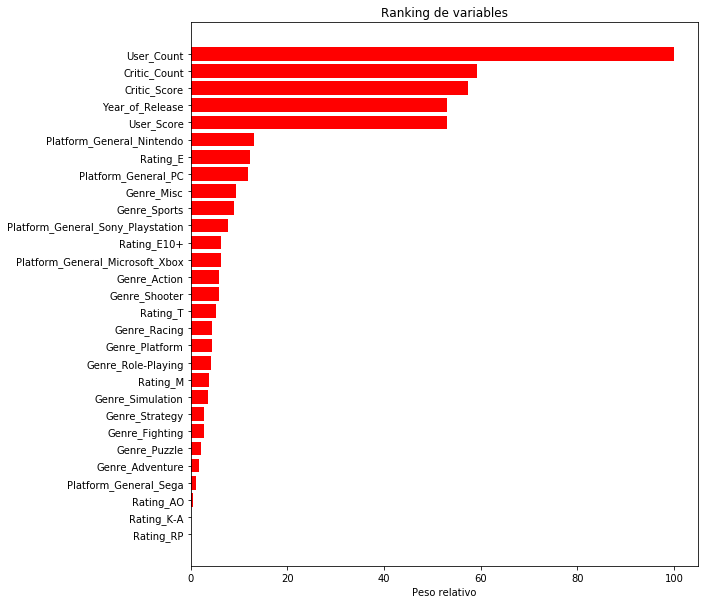

In [79]:
# Plot feature importance
feature_importance = grid_search_gbr.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center',color='red')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Peso relativo')
plt.title('Ranking de variables')
plt.show()

## 4. Conclusión


### 4.1 Resumen preparación de datos
Hemos trabajado en varios puntos fundamentales para esta práctica:

 -->  Remplazamos con la media los nulos con características de tipo numérico.
 
 -->  Eliminamos los restantes registros con nulos en características categoricas.
 
 -->  Filtramos los datos entre los años 1991 y 2016 incluidos.
 
 -->  Sustituimos los valores de plataformas por su nombre genérico y pasamos a valores ceros y unos(One Hot Encoding)
 
 -->  Y por último eliminamos los valores de columnas que no aportan valor
 
### 4.2 Resultado y aplicaciones del modelo
La mejor puntuación de validación cruzada del GBR y su puntuación de test son de 0,32 y 0,35 medidos en RMSE. Esto significa que, en primer lugar, el modelo se generaliza bien, ya que la diferencia entre la puntuación de validación cruzada y la puntuación del conjunto de prueba es mínima. Sin embargo, significa que el error promedio que hace el modelo en sus predicciones asciende a 35%. Eso significa que al hacer un pronóstico, en promedio, el modelo se equivocará al pronosticar ventas de videojuegos de 350 mil unidades sobre un millón.

Un hallazgo interesante es que el año de lanzamiento es el quinto factor más importante para explicar los resultados. Indicación de la industria del videojuego está en crecimiento: a medida que aumenta el valor del año, las ventas aumentan principalmente debido a que el mercado está creciendo.

¿podemos considerar bueno nuestro modelo?

Depende del punto de vista. Si utilizara este modelo para pronosticar las ventas de un juego de desarrollo de una empresa pequeña, sería mejor utilizar otros métodos. La razón es que normalmente los estudios más pequeños venden menos de un millón de copias. En este caso, un error de 350 mil unidades es mucho y puede tener un tremendo impacto financiero en la compañía. Sin embargo, si usa este modelo para pronosticar las ventas de la unidad del juego de desarrollador de juegos más grande, un error de 350 mil unidades no está mal. Si pronostica las ventas de un desarrollador que normalmente vende 3 millones de copias, una desviación de aproximadamente el 10% es asumible, aunque mejorable. 

Pero es fudamental pensar que un futuro cercano entraran nuevas tecnologías(como la Realidad Virtual) que cambiarán el mercado de videojuegos e invalidarán estos pronósticos a largo plazo.